# Part II - (Ford GoBike System Data)
## by (Bouchoucha Mohammed)

## Investigation Overview


The aim of this investigation was to examine the user characteristics of GoBike over the period of February 2019 to identify factors that could potentially predict long-term usage. This information could then be used to provide better service to users.




## Dataset Overview

This document delves into a dataset that includes approximately 165,589 bike trips from February 2019, featuring 19 different variables. For this analysis, I am particularly interested in examining age, gender, user type, duration of usage, and time of usage. These variables are expected to provide us with sufficient data to make predictions and draw meaningful insights from the dataset.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
# do all cleaning that i did in part 1
df.dropna(inplace=True)
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)
df['Age'] = 2019 - df['member_birth_year']
df['Age'] = df['Age'].astype(int)
df["duration_min"]=df["duration_sec"]/60
df.drop([ 'member_birth_year','duration_sec'], axis=1, inplace=True)
df['hour_start']=df['start_time'].dt.hour
df['day_start']=df['start_time'].dt.day_name()
df['month_start']=df['start_time'].dt.month
df = df[df["duration_min"] <= 30]
df = df[df["Age"] <= 60]


## (Visualization 1)

* violin chart represent the gender types of our dataset with the age or each one 

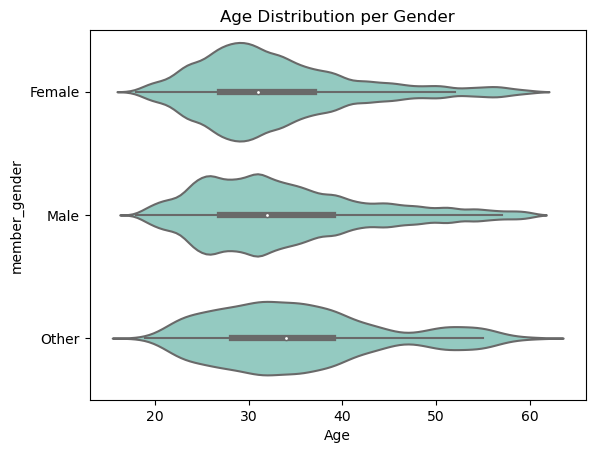

In [5]:
# Set the color for the violin plot
color = '#8bd3c7'

# Create a violin plot for the age distribution of each gender
sb.violinplot(data=df, x='Age', y='member_gender', color=color)

# Set the title for the plot
plt.title('Age Distribution per Gender')

# Show the plot
plt.show()



## (Visualization 2)

two heatmaps to display hourly usage during weekdays for customers and subscribers. We can observe that customer rides mostly occur during midnight and midday and Subscriber during working days and on the beginning and ending of the work day

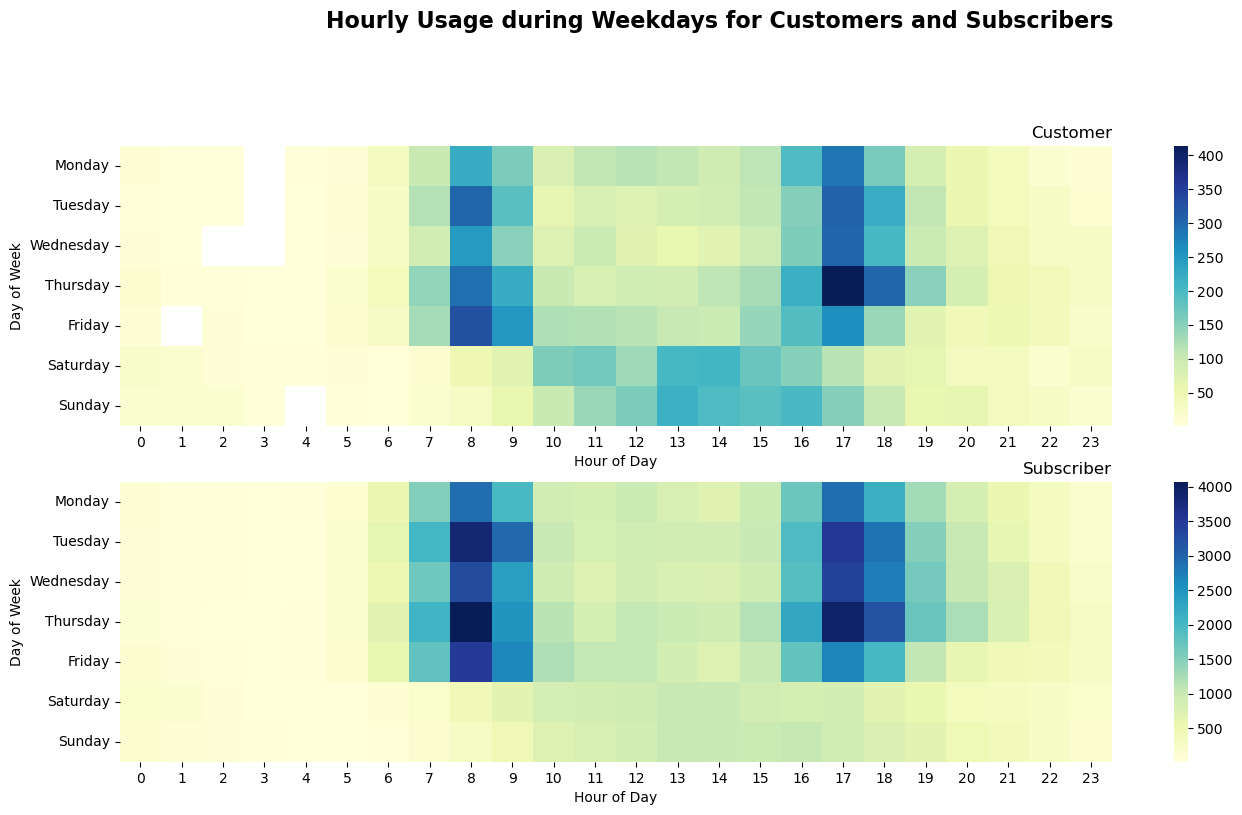

In [7]:
# Define the desired weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#set the figure size
plt.figure(figsize=(16, 8))

# Plot the heatmap for Customers
# Create a subplot for the Customers heatmap
plt.subplot(2, 1, 1)

 # Filter the DataFrame to only include Customers
customers = df.query('user_type == "Customer"') 

# Group the data by day and hour, count the number of trips, and reset index
ct_counts = customers.groupby(['day_start', 'hour_start']).size().reset_index(name='count')  

# Set the categories and order for the days of the week
ct_counts['day_start'] = pd.Categorical(ct_counts['day_start'], categories=weekday_order, ordered=True) 

# Convert the data into a pivot table with days of the week on the index and hours of the day on the columns
ct_counts = ct_counts.pivot(index='day_start', columns='hour_start', values='count') 

# Create the heatmap using seaborn
sb.heatmap(ct_counts, cmap='YlGnBu') 

# Add a title for the heatmap
plt.title('Customer', loc='right')  

# Add a label for the x-axis
plt.xlabel('Hour of Day')

# Add a label for the y-axis
plt.ylabel('Day of Week')  

# Plot the heatmap for Subscribers
# Create a subplot for the Subscribers heatmap
plt.subplot(2, 1, 2)

# Filter the DataFrame to only include Subscribers
subscribers = df.query('user_type == "Subscriber"') 

# Group the data by day and hour, count the number of trips, and reset index
st_counts = subscribers.groupby(['day_start', 'hour_start']).size().reset_index(name='count')  

# Set the categories and order for the days of the week
st_counts['day_start'] = pd.Categorical(st_counts['day_start'], categories=weekday_order, ordered=True) 

# Convert the data into a pivot table with days of the week on the index and hours of the day on the columns
st_counts = st_counts.pivot(index='day_start', columns='hour_start', values='count') 

# Create the heatmap using seaborn
sb.heatmap(st_counts, cmap='YlGnBu')  

# Add a title for the heatmap
plt.title('Subscriber', loc='right')  

# Add a label for the x-axis
plt.xlabel('Hour of Day') 

# Add a label for the y-axis
plt.ylabel('Day of Week')  

# Add a super title
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', y=1.05, fontsize=16, fontweight='bold')

# Show the plot
plt.show()

## (Visualization 3)

* The visualization below includes two bar graphs which depict the distribution of non-sharing and sharing trips across gender and user types.

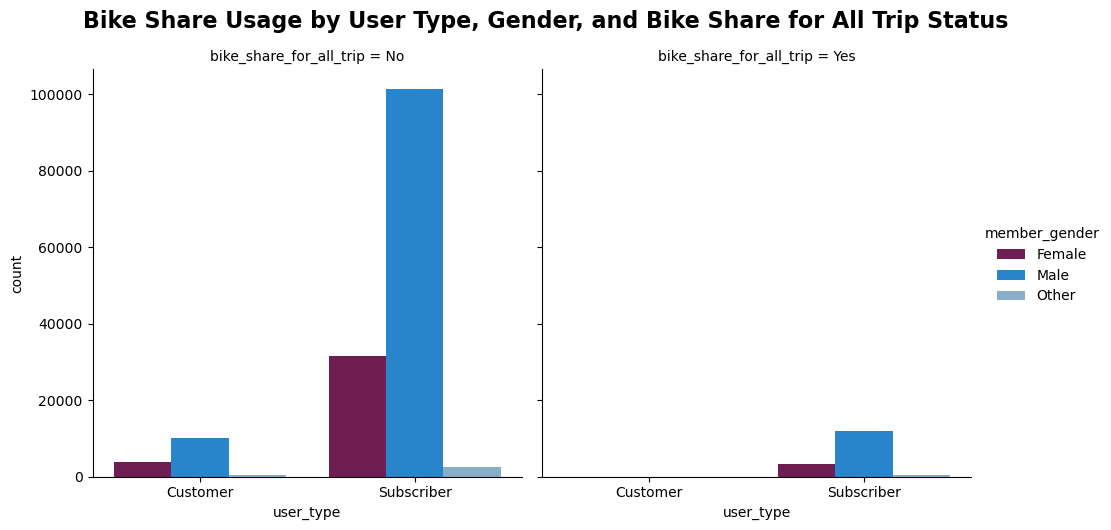

In [6]:
# create a color dictionary for each gender
color = {'Female': '#7c1158', 'Male': '#0d88e6', 'Other': '#7eb0d5'}

# create a categorical plot using Seaborn's catplot to show the number of bike trips
# for each user type and gender, with bike share status as a column
plot = sb.catplot(data=df, x="user_type", hue="member_gender", col="bike_share_for_all_trip", kind="count", palette=color)

# add a title to the plot
plot.fig.suptitle("Bike Share Usage by User Type, Gender, and Bike Share for All Trip Status", y=1.05, fontsize=16, fontweight='bold')

# display the plot
plt.show()